<a href="https://colab.research.google.com/github/didacuscha/Maths_for_AI/blob/main/Laboratorio_Hessiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

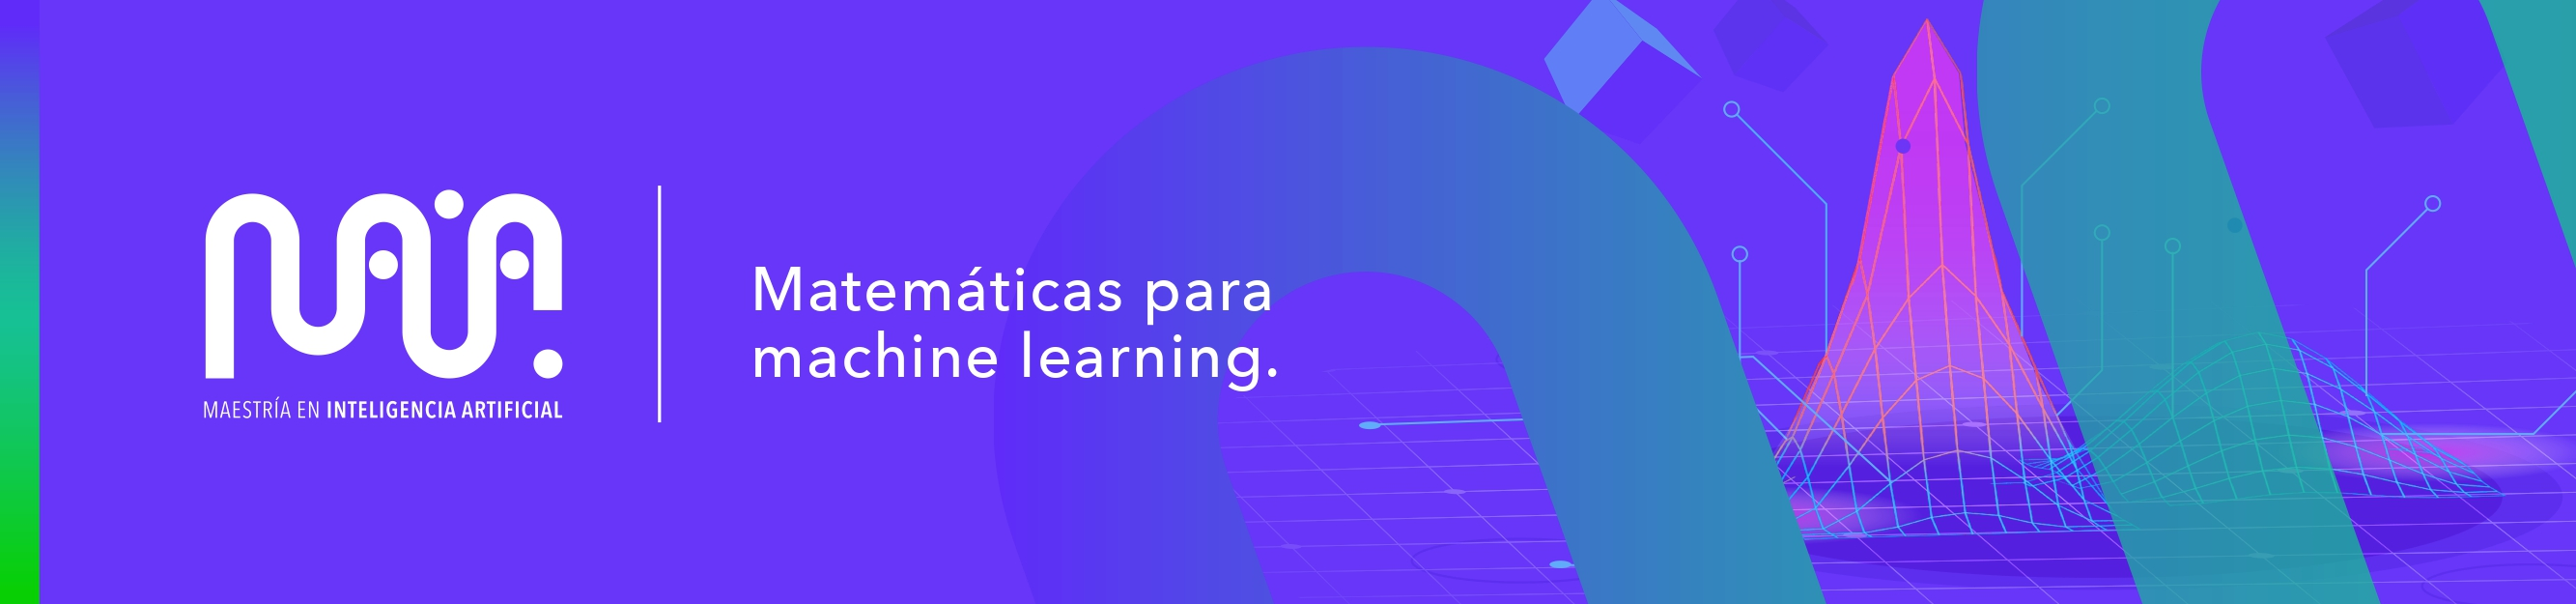

# **Laboratorio: matrix Hessiana**

Recordemos que la Hessiana es la matriz cuadrada $n \times n$ que contiene todas las posibles segundas derivadas parciales de una función $f:\mathbb{R}^n → \mathbb{R}$ que recibe como entrada un vector $x ∈ \mathbb{R}^n$.

Durante esta práctica de laboratorio veremos una manera de calcular la matriz Hessiana de una función $f:\mathbb{R}^2 → \mathbb{R}$ y su posterior clasificación a partir de los valores propios.

In [2]:
# Se importan las librerías necesarias para la práctica

import numpy as np
import matplotlib.pyplot as plt

##**1. Función de prueba**

La función con la que trabajaremos a lo largo de esta práctica es:

##$f(x)=x_1^3-3x_1x_2^2$

Empezaremos graficando la función tanto en 3D como en gráfica de contorno, e identificaremos los puntos de valle y montaña que presenta esta función.

###**Grafica 3D**

[Text(0.5, 0.92, 'Gráfica 3D')]

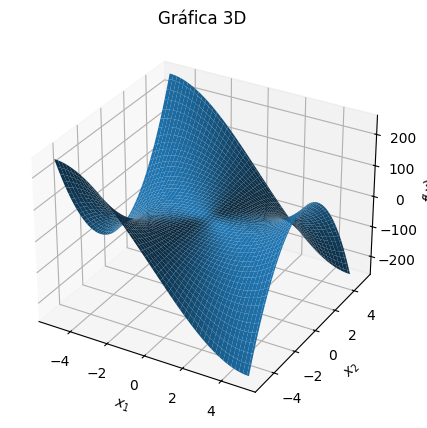

In [ ]:
# Crear malla de puntos en el plano 2D
x_1 = np.linspace(-5,5,100)
x_2 = np.linspace(-5,5,100)
(X_1, X_2) = np.meshgrid(x_1, x_2)

# Se define la función que se desea graficar
f = X_1**3 - 3*X_1*(X_2**2)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"} ,  figsize = (5,5))
surf = ax.plot_surface(X_1, X_2, f)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x)$")
ax.set_box_aspect(aspect=None)
ax.set(title = 'Gráfica 3D')



###**Gráfica de contorno**

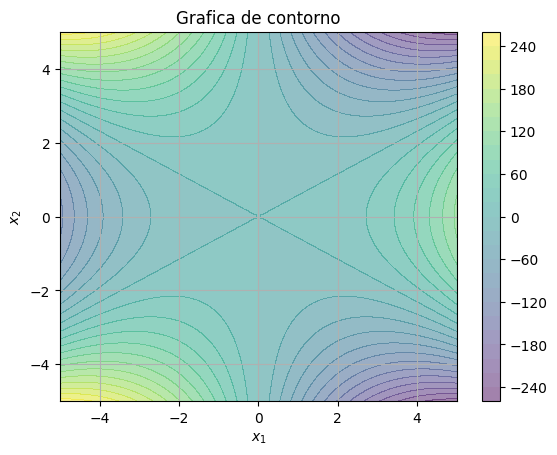

In [ ]:
# Graficar utlizando la función contourf
fig, ax = plt.subplots()
CS1 = ax.contourf(X_1, X_2, f, alpha = 0.5, levels=30)
fig.colorbar(CS1)
ax.grid()
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set(title = 'Grafica de contorno')
plt.show()


A través de una inspección visual de la gráfica en 3D y el contorno de la función, podemos ver que el punto donde se encuentra un valle es $[0,0]^T$. Un punto donde hay una montaña puede ser, por ejemplo, el punto $[2,4]^T$

##**2. Calculo de la Hessiana**

Para empezar, vamos a hallar las derivadas parciales de $f$ con respecto a $x1$ y $x2$:

$ \dfrac{∂f}{∂x_1}(x)= 3x_1^2-3x_2^2 $

$ \dfrac{∂f}{∂x_2}(x)= -3x_2x_1 $


Siendo el gradiente:


\begin{align}
∇f(x)=
 \begin{pmatrix}
  3x_1^2-3x_2^2\\
  -6x_1x_2\\
\end{pmatrix}
 \end{align}


Después, vamos a hallar las segundas derivadas parciales, que corresponden a los elementos de la matriz Hessiana:

$ \dfrac{∂^2f}{∂x_1^2}(x)= 6x_1 $

$ \dfrac{∂^2f}{∂x_1x_2}(x)=-6x_2 $

$ \dfrac{∂^2f}{∂x_2^2}(x)= -6x_1  $

Lo que da como resultado la siguiente matriz Hessiana:

\begin{align}
F(x)=
 \begin{pmatrix}
  6x_1 & -6x_2\\
 -6x_2 & -6x_1 \\
\end{pmatrix}
 \end{align}


Ahora bien, para poder evaluar esta matriz en diferentes puntos en 2D, es necesario declarar la siguiente función:

In [ ]:
def hessiana_evaluada(x1,x2):
    f_x1x1 = 6*x1
    f_x1x2 = -6*x2
    f_x2x1 = -6*x2
    f_x2x2 = -6*x1

    return np.array([[f_x1x1, f_x1x2],[f_x2x1,f_x2x2]])

##**3. Categorización de la Hessiana**

## **3.1 Prueba de positividad de una matriz**

A continuación se muestra una función de Python que determina el tipo de matriz que se tiene a partir de sus valores propios, siendo ***M*** una matriz simétrica con tamaño $n\times n$ y elementos reales.


In [ ]:
def test_positividad(M):
  vals ,vec =np.linalg.eig(M)
  if all(val > 0 for val in vals):
    resp="Positiva definida"
  elif all(val >= 0 for val in vals):
    resp="Positiva semidefinida"
  elif all(val < 0 for val in vals):
    resp="Negativa definida"
  elif all(val <= 0 for val in vals):
    resp="Negativa semidefinida"
  else:
    resp="Indefinida"
  return (resp)

**Ejemplo**

Vamos a definir el tipo de matriz que se tiene utilizando la función *test_positividad()* para una matriz ***M*** simétrica de tamaño $n\times n$ y elementos reales.


\begin{align}
M=
 \begin{pmatrix}
 5 & 0 & 0 \\
 0 & 7 & 0\\
 0 & 0 & 9 \\
\end{pmatrix}
 \end{align}


In [ ]:
#Se declara la matriz M utilizando la función Matrix de Sympy
M= np.array([[5,0,0],[0,7,0],[0,0,9]])

# Se utiliza la función test_positividad()
test_positividad(M)

'Positiva definida'

Al ser una matriz diagonal sus valores propios corresponden a los valores de la diagonal. Y estos al ser todos positivos da como resultado una matriz Positiva definida.

## **3.2 Evaluación de la Hessiana en puntos 2D**

Usando le función de Python para categorizar una matriz de acuerdo con su positividad, vamos a categorizar la matriz Hessiana de la función matemática dada par alos siguientes puntos:

* $x=[0,0]^T$
* $x=[2,4]^T$



Primero calculamos la Hessiana para cada punto:


In [ ]:
# Para el punto valle (0,0)

hessiana1= hessiana_evaluada(0,0)
print("Hessiana en el punto valle (0,0):", hessiana1)

# Para el punto montaña (2,4)
hessiana2= hessiana_evaluada(2,4)
print("Hessiana en el punto montaña (2,4):", hessiana2)


Hessiana en el punto valle (0,0): [[0 0]
 [0 0]]
Hessiana en el punto montaña (2,4): [[ 12 -24]
 [-24 -12]]


Corroboramos los valores propios de la matriz:

In [ ]:
# Valores propios para la Hessiana evaluada en el punto valle (0,0)
eigenvals1= np.linalg.eigvals(hessiana1)
print("Valores propios Hessiana 1:",eigenvals1)

# Valores propios para la Hessiana evaluada en el punto montaña (2,4)
eigenvals2= np.linalg.eigvals(hessiana2)
print("Valores propios Hessiana 2:",eigenvals2)

Valores propios Hessiana 1: [0. 0.]
Valores propios Hessiana 2: [ 26.83281573 -26.83281573]


y por último hacemos el test de positividad usando la función de Pyhton:

In [ ]:
# Hessiana en el punto (0,0)
t1= test_positividad(hessiana1)


#Hessiana en el punto (2,4)
t2= test_positividad(hessiana2)

print("La Hessiana en el punto [0,0] es",t1,"y la Hessiana en el punto [2,4]]",t2)

La Hessiana en el punto [0,0] es Positiva semidefinida y la Hessiana en el punto [2,4]] Indefinida


##**4. Ejercicios**

####**Ejercicio 1: Pruebe la función *test_positividad()* en la matriz presentada a continuación. Esta matriz se genera de forma aleatoria con una semilla fija.**




In [ ]:
#Semilla fija
semilla =np.random.seed(19)

#Matriz triangular inferior
triangular_inf = np.random.randint(-10, 10, size=(15, 15))

#Matriz simétrica
matriz = np.tril(triangular_inf) + np.tril(triangular_inf, -1).T

print(matriz)

[[  4   6  -5  -6  -9   4   1   4  -4   9   2  -3   3   5   4]
 [  6  -3 -10 -10  -2  -5   2  -5   4   9  -6   2   3   8   1]
 [ -5 -10   7  -1  -1  -6  -1  -5   2   0  -3  -1   1   1   6]
 [ -6 -10  -1  -7   1   9  -7   1  -4   7   8  -2   1  -6  -2]
 [ -9  -2  -1   1  -8  -9   0  -3  -7  -4  -6   2  -6   2   5]
 [  4  -5  -6   9  -9  -6  -1   7  -1  -3   8   4   5  -2  -6]
 [  1   2  -1  -7   0  -1   5  -7  -7   8   3   1   5 -10  -8]
 [  4  -5  -5   1  -3   7  -7   3 -10   3  -2  -7   0   8   4]
 [ -4   4   2  -4  -7  -1  -7 -10  -1  -7   3  -8  -8   0   8]
 [  9   9   0   7  -4  -3   8   3  -7   6  -7 -10  -9  -7 -10]
 [  2  -6  -3   8  -6   8   3  -2   3  -7  -1  -8  -8   4   8]
 [ -3   2  -1  -2   2   4   1  -7  -8 -10  -8  -3  -7  -1   7]
 [  3   3   1   1  -6   5   5   0  -8  -9  -8  -7   5   7   0]
 [  5   8   1  -6   2  -2 -10   8   0  -7   4  -1   7   4  -3]
 [  4   1   6  -2   5  -6  -8   4   8 -10   8   7   0  -3   5]]


In [ ]:
t1 = test_positividad(matriz)
print("La matriz es",t1)

La matriz es Indefinida


####**Ejercicio 2: Tenga en cuenta la siguiente función:**
$f_1(x)=(x_1-2)^4 -x_2^2$



Grafique la función $f(x)$ en 3D y contorno para el rango $-3 ≤ x_1 ≤ 5$ y $-4 ≤ x_2≤4$

[Text(0.5, 0.92, 'Gráfica 3D')]

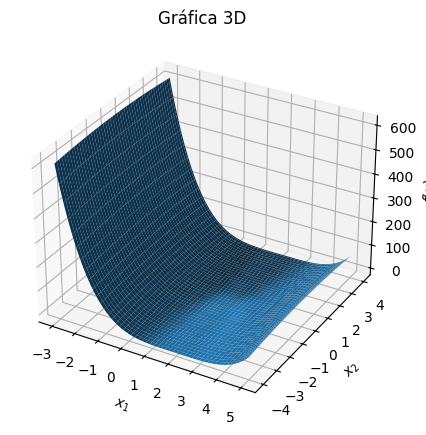

In [3]:
# Crear malla de puntos en el plano 2D
x_1 = np.linspace(-3,5,100)
x_2 = np.linspace(-4,4,100)
(X_1, X_2) = np.meshgrid(x_1, x_2)

# Se define la función que se desea graficar
f = (X_1-2)**4 - X_2**2


fig, ax = plt.subplots(subplot_kw={"projection": "3d"} ,  figsize = (5,5))
surf = ax.plot_surface(X_1, X_2, f)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x)$")
ax.set_box_aspect(aspect=None)
ax.set(title = 'Gráfica 3D')

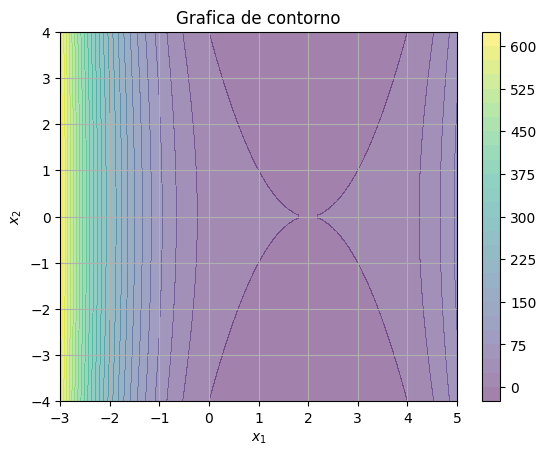

In [4]:
# Graficar utlizando la función contourf
fig, ax = plt.subplots()
CS1 = ax.contourf(X_1, X_2, f, alpha = 0.5, levels=30)
fig.colorbar(CS1)
ax.grid()
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set(title = 'Grafica de contorno')
plt.show()

Calcule la matriz Hessiana de $f_1(x)$ y redefina la función de Python *hessiana_evaluada(x1,x2)*:

In [ ]:
# Funcion : f = (X_1-2)**4 - X_2**2
# Primer paso, encontrar las derivadas parciales de f conrespeto a x1 y x2

# af/ax1(x) =
# af/ax2(x) =

# Con estas dos derivadas podemos plantear el gradiente delta_f(x)


# y ya con esto, podemos hayar las segundas derivadas parciales, que son los elementos de la matriz hessiana

# a2_f/a_x1_2(x) =
# a2_f/a_x1_x2(x) =
# a2_f/a_x2_2(x) =

# Ya tenemos la matriz hessiana

# Evaluamos la matriz en diferentes puntos 2D

# funcion hessiana evaluada

def hessiana_evaluada2(x1,x2):
    f_x1x1 =
    f_x1x2 =
    f_x2x1 =
    f_x2x2 =

    return np.array



Evalúe la matriz Hessiana en los puntos $x=[2,0]^T$ y $x=[4,3]^T$,  y categorice las matrices resultantes mediante el test de positividad.

